### Work and Health
1. Importing the data and building the data-frames
2. data exploration
    1. basic exploration
    2. statistical exploration
    3. visual exploration
3. Pre-processing
    1. Data Cleaning
    2. Outliers
    3. Missing Values
    4. Feature Engineering
    5. In-depth exploration
    6. Data transformation

<br><br>
note 1: focus on 2009 vs 2015<br>
note 2: drop hypertensive heart diseases due to low count of obs
1. geospatial analysis first <br>


LABOR INDICATORS: https://databank.worldbank.org/source/world-development-indicators

__TODO:__ create functions to create data frame in function of year and gender

<br>
Regarding the report --> get articles showing work related diseases
<br> 
1. https://osha.europa.eu/en/themes/work-related-diseases <br>

* EU-OSHA’s work on work-related diseases aims to provide an evidence base for prevention, policy and practice. Another important objective is to provide a better overview of the extent of the occupational burden of disease.

* Work-related diseases include:

1. Musculoskeletal disorders - OK
2. Stress and mental health disorders (Bipolar disorder, anxiety, depressive disorders) 
3. Work-related cancer
4. Skin diseases (dermatitis)
5. Work-related diseases from biological agents


### Importing the data, libraries and working on the data-frames

In [1]:
#Import the basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df_diseases_1 = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx_2/IHME-GBD_2019_DATA-16b07a3d-1/IHME-GBD_2019_DATA-16b07a3d-1.csv')
df_diseases_2 = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx_2/IHME-GBD_2019_DATA-16b07a3d-2/IHME-GBD_2019_DATA-16b07a3d-2.csv')

In [4]:
df_diseases_1

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,50,Montenegro,1,Male,22,All Ages,570,Bipolar disorder,1,Number,2000,1.423576e+02,1.779206e+02,1.128066e+02
1,6,Incidence,50,Montenegro,2,Female,22,All Ages,570,Bipolar disorder,1,Number,2000,1.506927e+02,1.857770e+02,1.198290e+02
2,6,Incidence,50,Montenegro,3,Both,22,All Ages,570,Bipolar disorder,1,Number,2000,2.930503e+02,3.616786e+02,2.339082e+02
3,6,Incidence,50,Montenegro,1,Male,22,All Ages,570,Bipolar disorder,2,Percent,2000,9.540404e-05,1.188501e-04,7.561816e-05
4,6,Incidence,50,Montenegro,2,Female,22,All Ages,570,Bipolar disorder,2,Percent,2000,9.401555e-05,1.161988e-04,7.419324e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,5,Prevalence,99,Uruguay,1,Male,22,All Ages,494,Stroke,3,Rate,2018,1.028443e+03,1.133180e+03,9.347537e+02
499996,5,Prevalence,99,Uruguay,2,Female,22,All Ages,494,Stroke,3,Rate,2018,1.549879e+03,1.713179e+03,1.426090e+03
499997,5,Prevalence,99,Uruguay,3,Both,22,All Ages,494,Stroke,3,Rate,2018,1.299739e+03,1.431940e+03,1.198089e+03
499998,5,Prevalence,152,Saudi Arabia,1,Male,22,All Ages,626,Musculoskeletal disorders,1,Number,2018,3.244096e+06,3.515826e+06,2.977208e+06


In [5]:
df_diseases_2

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,152,Saudi Arabia,3,Both,22,All Ages,626,Musculoskeletal disorders,1,Number,2018,5.809518e+06,6.272916e+06,5.348587e+06
1,5,Prevalence,152,Saudi Arabia,1,Male,22,All Ages,626,Musculoskeletal disorders,2,Percent,2018,1.671504e-01,1.809869e-01,1.533542e-01
2,5,Prevalence,152,Saudi Arabia,2,Female,22,All Ages,626,Musculoskeletal disorders,2,Percent,2018,1.802424e-01,1.946299e-01,1.665686e-01
3,5,Prevalence,152,Saudi Arabia,3,Both,22,All Ages,626,Musculoskeletal disorders,2,Percent,2018,1.726892e-01,1.864539e-01,1.589072e-01
4,5,Prevalence,152,Saudi Arabia,1,Male,22,All Ages,626,Musculoskeletal disorders,3,Rate,2018,1.592918e+04,1.726343e+04,1.461870e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14075,5,Prevalence,422,United States Virgin Islands,2,Female,22,All Ages,494,Stroke,2,Percent,2019,1.754018e-02,1.912189e-02,1.611813e-02
14076,5,Prevalence,422,United States Virgin Islands,3,Both,22,All Ages,494,Stroke,2,Percent,2019,1.652476e-02,1.788015e-02,1.524949e-02
14077,5,Prevalence,422,United States Virgin Islands,1,Male,22,All Ages,494,Stroke,3,Rate,2019,1.465107e+03,1.601300e+03,1.336953e+03
14078,5,Prevalence,422,United States Virgin Islands,2,Female,22,All Ages,494,Stroke,3,Rate,2019,1.704040e+03,1.857118e+03,1.565304e+03


In [6]:
df_diseases_1.measure_name.value_counts()

Incidence     257040
Prevalence    242960
Name: measure_name, dtype: int64

In [22]:
df_diseases = df_diseases_1.append(df_diseases_2).reset_index()

In [25]:
df_diseases.drop(columns = 'index', inplace = True)

In [26]:
df_diseases

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,50,Montenegro,1,Male,22,All Ages,570,Bipolar disorder,1,Number,2000,142.357576,177.920570,112.806613
1,6,Incidence,50,Montenegro,2,Female,22,All Ages,570,Bipolar disorder,1,Number,2000,150.692711,185.776955,119.829008
2,6,Incidence,50,Montenegro,3,Both,22,All Ages,570,Bipolar disorder,1,Number,2000,293.050287,361.678563,233.908217
3,6,Incidence,50,Montenegro,1,Male,22,All Ages,570,Bipolar disorder,2,Percent,2000,0.000095,0.000119,0.000076
4,6,Incidence,50,Montenegro,2,Female,22,All Ages,570,Bipolar disorder,2,Percent,2000,0.000094,0.000116,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514075,5,Prevalence,422,United States Virgin Islands,2,Female,22,All Ages,494,Stroke,2,Percent,2019,0.017540,0.019122,0.016118
514076,5,Prevalence,422,United States Virgin Islands,3,Both,22,All Ages,494,Stroke,2,Percent,2019,0.016525,0.017880,0.015249
514077,5,Prevalence,422,United States Virgin Islands,1,Male,22,All Ages,494,Stroke,3,Rate,2019,1465.107383,1601.300446,1336.952539
514078,5,Prevalence,422,United States Virgin Islands,2,Female,22,All Ages,494,Stroke,3,Rate,2019,1704.040207,1857.118432,1565.303744


In [27]:
df_diseases.sex_name.value_counts()

Female    171360
Male      171360
Both      171360
Name: sex_name, dtype: int64

### Let's first focus on a specific timestamp and explore spatial variations:
* year of 2009

In [30]:
#data cleaning - function that receives year of analysis, gender, metric and measure. Returns the "cleaned" df

def get_df(df,year,gender,metric,measure):
    #drop redundant columns (code for each feature, mainly)
    df.copy().drop(columns=['measure_id','location_id','measure_name','sex_id','age_id','age_name','cause_id','metric_id'\
                         ,'upper','lower'], inplace=True)
    
    #filter by gender and year (Male or Female)
    df = df.loc[df_diseases['sex_name'].isin([gender])]\
.loc[df_diseases['year'] == year].drop(columns=['sex_name','year']).copy()
    
    #filter by metric (Number, Percent or Rate)
    df = df.loc[df.metric_name == metric].copy()
    df.drop(columns = ['metric_name'],inplace = True)
    
    #filter by measure (Incidence or Prevalence)
    df = df.loc[df.measure_name == measure].copy()
    df.drop(columns = ['measure_name'],inplace = True)
    
    #pivoting table with disease names = columns
    df = df.copy().pivot(index='location_name', columns = 'cause_name', values = 'val')
    
    return df

In [31]:
df_male = get_df(df_diseases,2009,'Male','Rate','Incidence')

In [32]:
df_male

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
location_name,,,,,,,
Afghanistan,641.388829,60.517279,3738.893373,4214.337986,8687.222640,2463.796112,85.135150
Albania,458.450473,46.593467,1178.923328,4220.173972,11312.690647,5338.160171,167.253830
Algeria,615.163233,63.041104,3529.404016,4785.530392,9434.142808,3721.083803,114.130861
American Samoa,520.371323,25.664917,1556.953250,4596.948405,8570.204447,3945.655468,131.344759
Andorra,647.637501,54.443083,3301.244256,3005.018221,11951.900709,4883.993892,98.640179
...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),502.976635,70.722324,2717.065433,4575.000126,9148.698978,2571.518199,77.935414
Viet Nam,269.281392,31.771178,1251.852205,5207.017522,9688.570159,3963.514820,187.218625
Yemen,633.375726,58.538403,3494.816678,4248.330621,8616.291008,2619.436360,88.270797


### Basic exploration of df_male
1. for year = 2009
2. for gender = Male
3. for metric = Percentage

In [33]:
df_male.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,525.214662,53.144899,2874.843950,4359.184800,9743.474117,3595.390835,125.562147
std,110.900720,16.493836,1012.710963,734.471193,1457.593276,1097.452086,61.028548
min,257.010518,17.305151,1057.741412,2477.584562,6438.581329,1914.380259,48.359337
25%,455.039197,45.746618,2165.293361,4145.365374,8758.384334,2637.854876,84.727713
50%,517.272715,53.144988,2721.036403,4508.182021,9402.893508,3460.366310,108.686768
75%,576.304009,60.699841,3353.287091,4793.152356,11298.434460,4349.525521,152.771435
max,919.310210,118.367865,7173.243665,6408.537508,13000.527261,6451.518936,404.394409


#### Check for bias & outliers

In [34]:
df_male.skew()

cause_name
Anxiety disorders            0.552389
Bipolar disorder             0.280343
Depressive disorders         1.001591
Dermatitis                  -0.704890
Headache disorders           0.216219
Musculoskeletal disorders    0.550943
Stroke                       1.499192
dtype: float64

In [35]:
df_male.kurt()
#none of the diseases seem to have extreme outliers, though one should check the strokes to see why the high kurtosis

cause_name
Anxiety disorders            1.058298
Bipolar disorder             0.659740
Depressive disorders         1.471005
Dermatitis                   0.270582
Headache disorders          -0.869180
Musculoskeletal disorders   -0.527774
Stroke                       2.530444
dtype: float64

#### Basic visual exploration

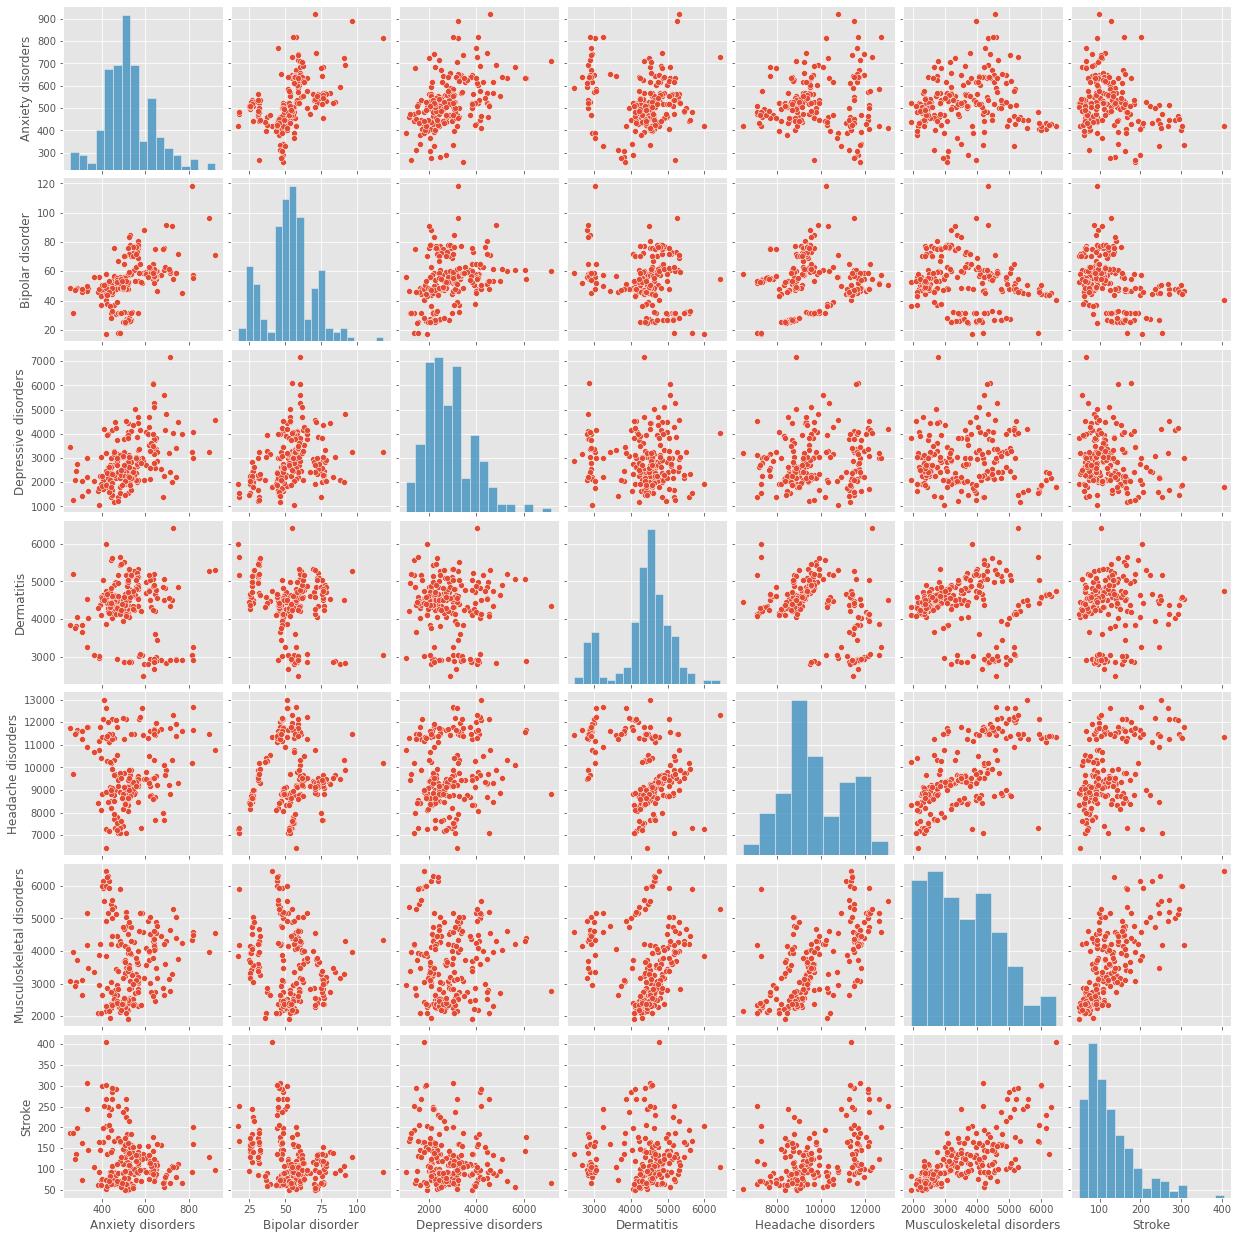

In [36]:
sns.pairplot(df_male)
plt.show()

#### Correlation check (spearman to catch non-linearities)

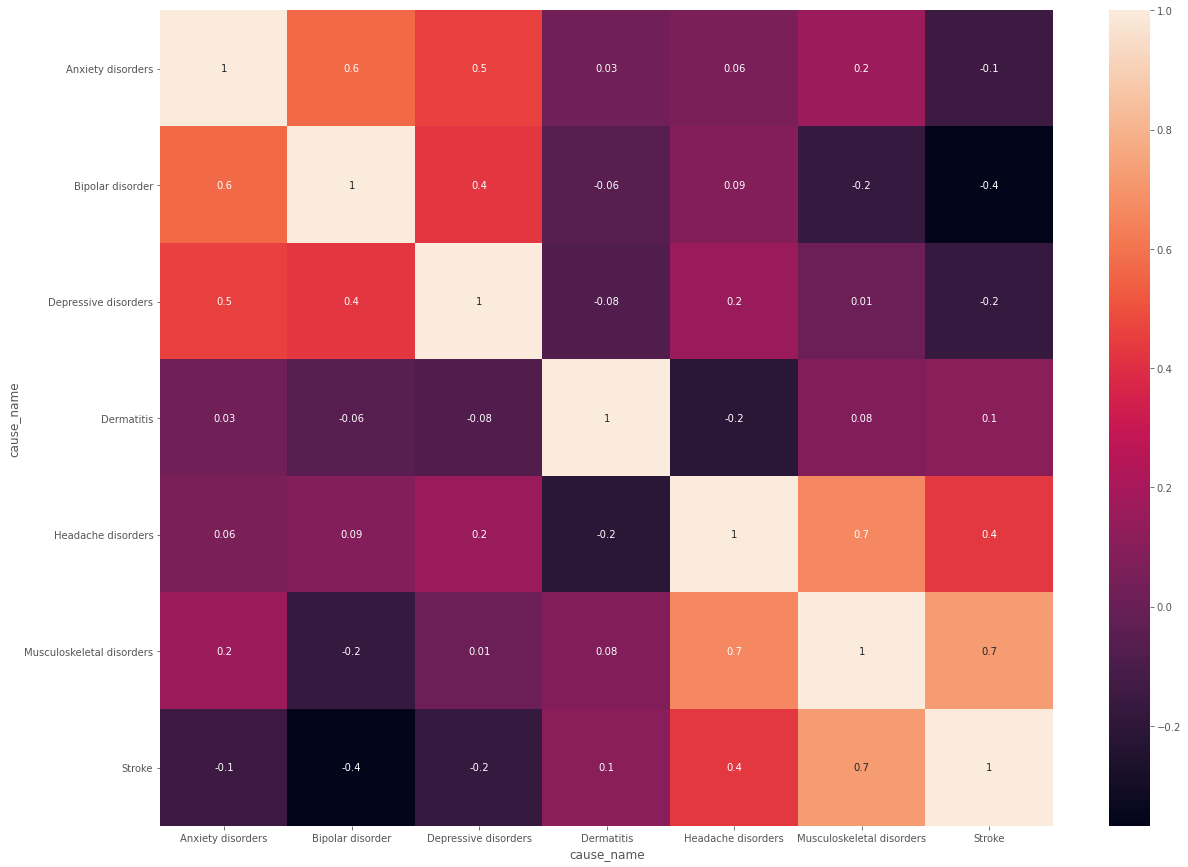

In [37]:
#check correlation between diseases:
df_corr = df_male.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()

* From the heatmap, we can note that Musculoskeleton disorders are highly correlated with stroke and headache disorders, thus for a possible cluster analysis, one should only keep 1 out of the 3.

### df_female for 2009

In [39]:
df_female = get_df(df_diseases,2009,'Female','Rate','Incidence')

In [40]:
df_female.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,728.336910,56.239998,4809.957268,5081.162499,10758.099518,4211.267696,143.434897
std,151.642184,18.697555,1649.237525,987.824769,1626.705921,1446.799939,74.851726
min,409.908678,17.451526,1238.987383,3107.428482,6709.623011,1745.015853,47.188240
25%,610.378297,45.556950,3617.259472,4527.610005,9681.062954,3073.360801,92.556853
50%,740.221731,55.305818,4547.563814,4976.303914,10376.792964,4193.558976,126.971900
75%,816.853302,70.458482,5923.734330,5729.926416,12577.867221,5379.218622,160.445297
max,1336.986796,105.479880,10539.070949,8273.267786,14237.831155,7460.013362,453.233439


In [41]:
df_female.skew()

cause_name
Anxiety disorders            0.562162
Bipolar disorder             0.000741
Depressive disorders         0.519432
Dermatitis                   0.404742
Headache disorders           0.115730
Musculoskeletal disorders    0.071665
Stroke                       1.821747
dtype: float64

In [42]:
df_female.kurt()

cause_name
Anxiety disorders            0.729770
Bipolar disorder            -0.630851
Depressive disorders         0.389971
Dermatitis                  -0.173598
Headache disorders          -0.724944
Musculoskeletal disorders   -0.991013
Stroke                       3.532985
dtype: float64

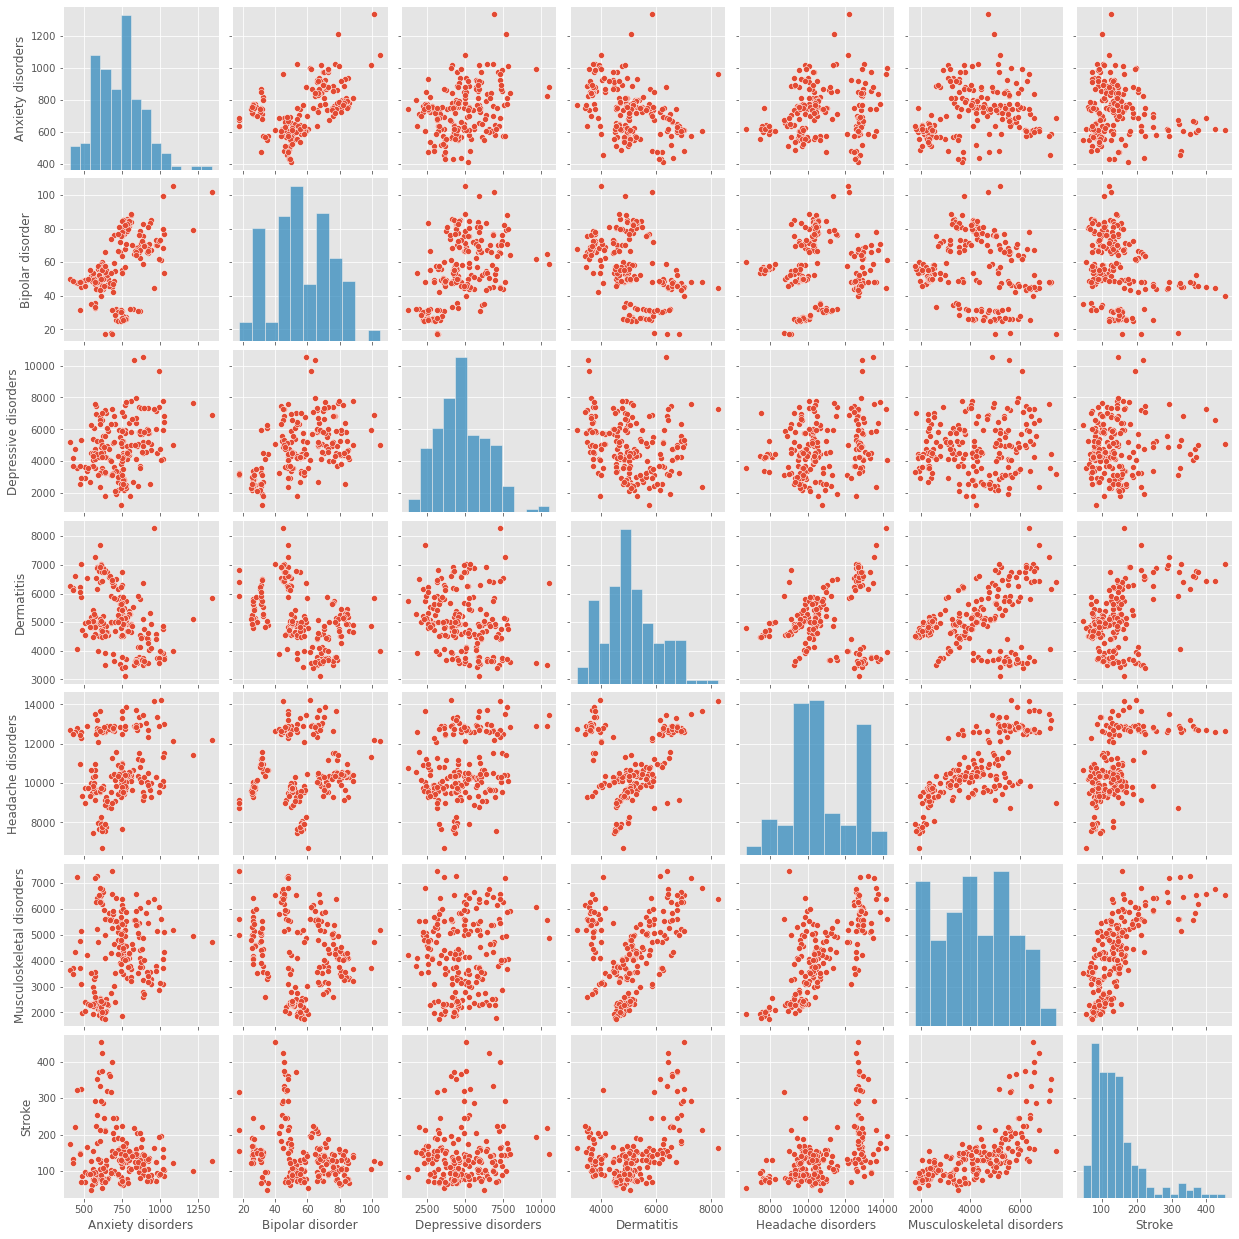

In [43]:
sns.pairplot(df_female)
plt.show()

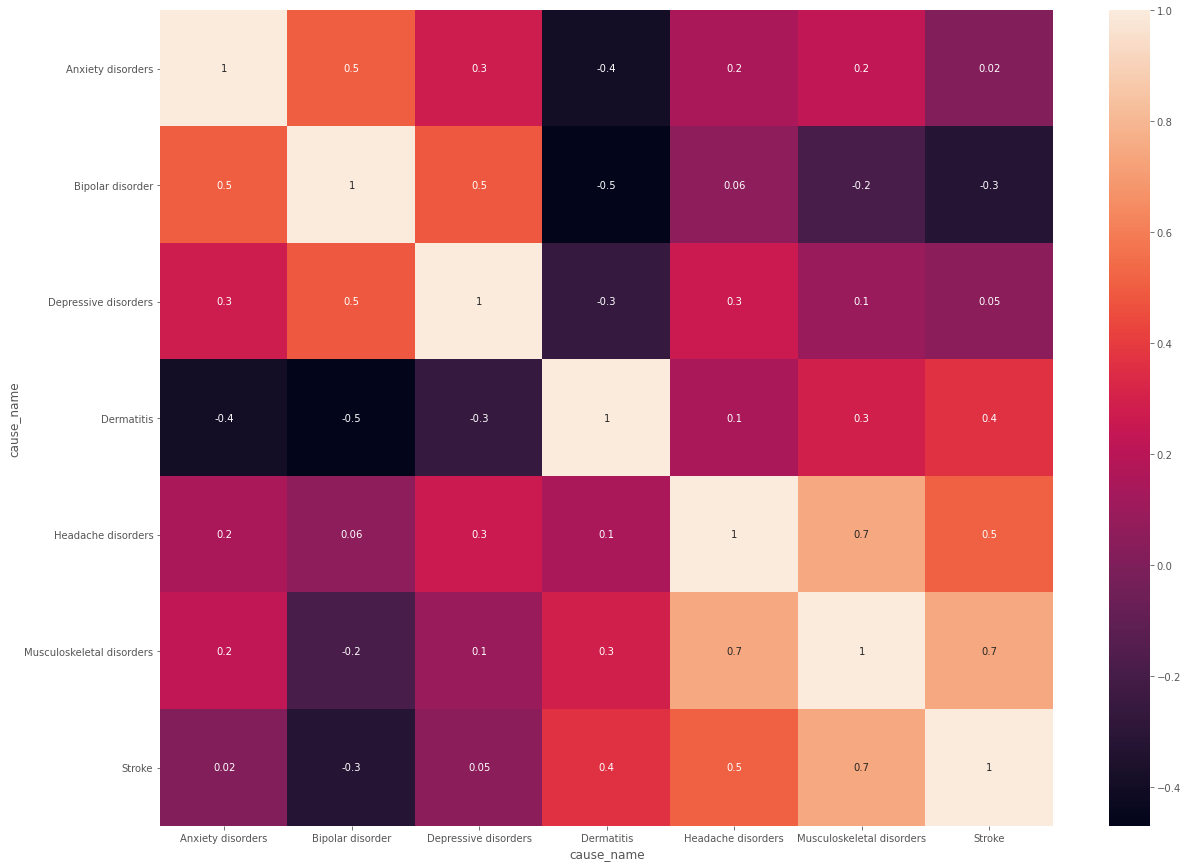

In [44]:
#check correlation between diseases:
df_corr = df_female.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()

* For the gender = Female, the correlation seems to be higher compared to the male gender. Also here we can note that Musculoskeleton disorders are highly correlated with stroke and headache disorders, thus for a possible cluster analysis, one should only keep 1 out of the 3.

### df_all for 2009
* includes both male and female genders

In [45]:
df_both = get_df(df_diseases,2009,'Both','Rate','Incidence')

In [46]:
df_both.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,626.113991,54.667218,3848.457766,4729.200034,10254.187240,3909.907768,134.672136
std,127.091691,17.422057,1267.210581,786.884816,1533.679796,1247.439676,67.344116
min,334.075556,17.427971,1225.377490,2795.506644,6572.752637,1941.034362,53.135734
25%,532.516315,45.910852,2910.612476,4392.961401,9205.177728,2860.825734,88.122064
50%,624.186805,54.497119,3671.010591,4787.886795,9917.773830,3803.869037,120.707528
75%,692.104630,65.440292,4652.275697,5217.883356,11977.886011,4845.378154,157.755563
max,1117.506424,111.769667,8259.280389,7355.310294,13462.691108,6680.344214,429.546598


In [47]:
df_both.kurt()

cause_name
Anxiety disorders            1.053709
Bipolar disorder            -0.166965
Depressive disorders         0.446392
Dermatitis                   0.183518
Headache disorders          -0.831652
Musculoskeletal disorders   -0.924782
Stroke                       3.130304
dtype: float64

In [48]:
df_both.skew()

cause_name
Anxiety disorders            0.584239
Bipolar disorder             0.081794
Depressive disorders         0.659481
Dermatitis                  -0.297728
Headache disorders           0.167922
Musculoskeletal disorders    0.255427
Stroke                       1.693482
dtype: float64

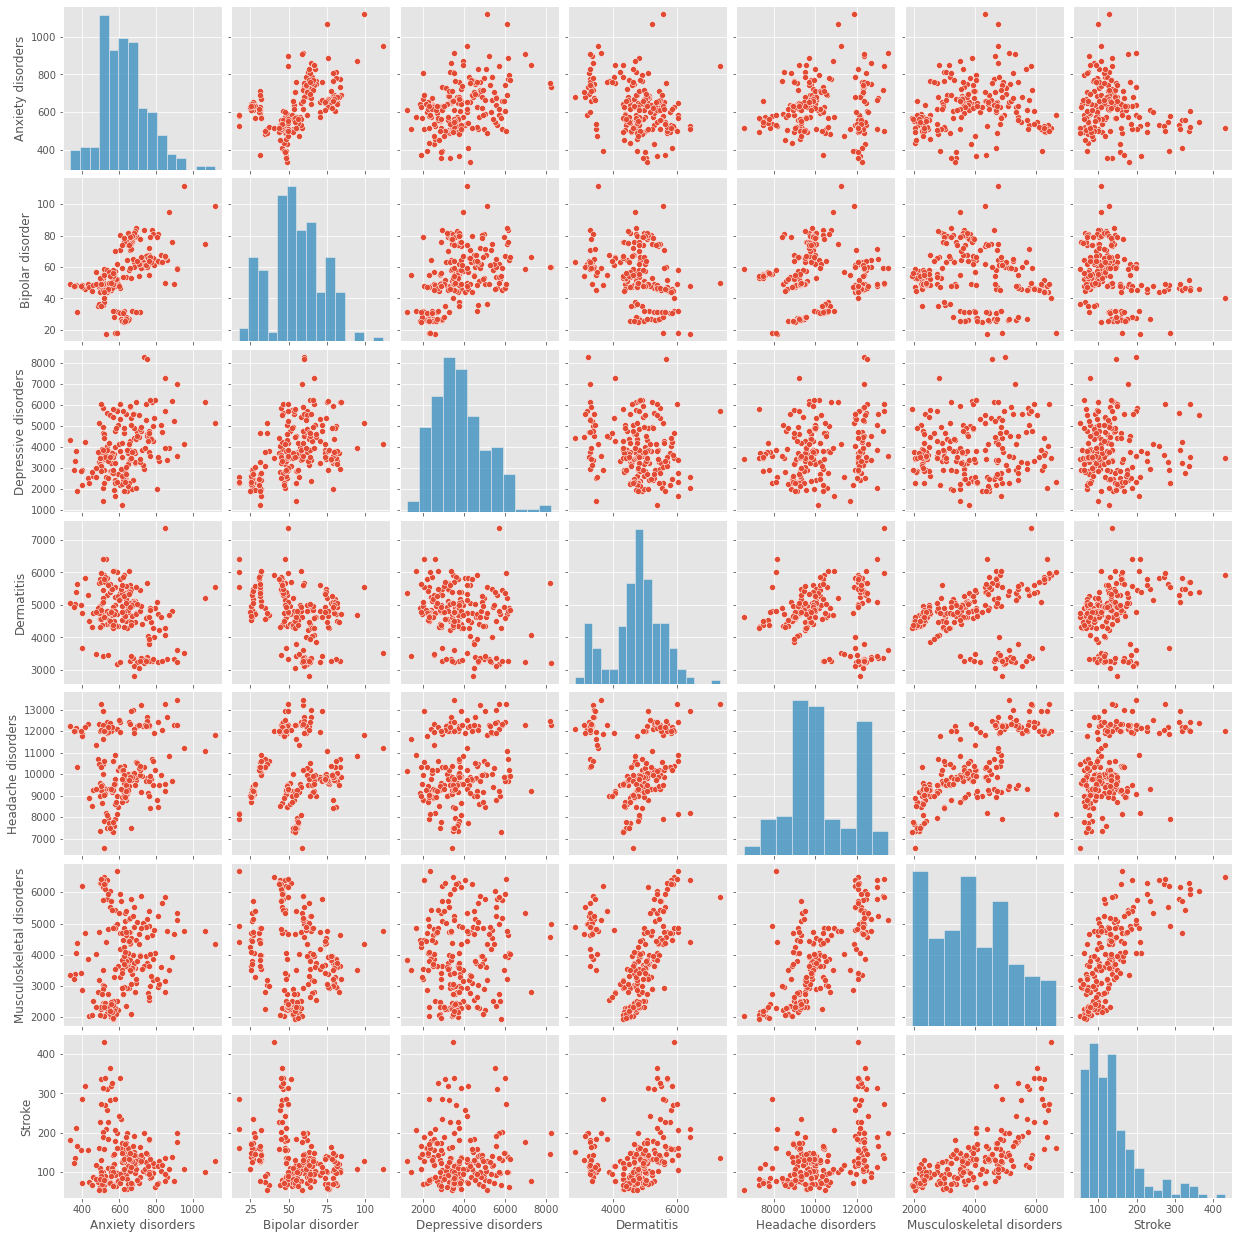

In [49]:
sns.pairplot(df_both)
plt.show()

### Outliers

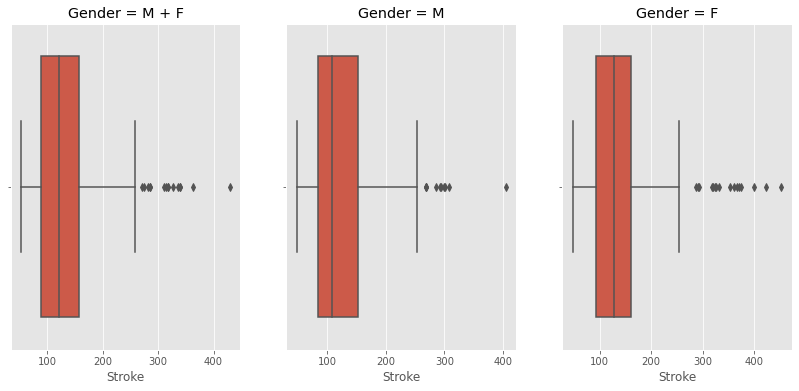

In [50]:
# Stroke has highest kurtosis in all data frames
fig, axes = plt.subplots(1,3, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df_both, x = 'Stroke').set(title='Gender = M + F') 
sns.boxplot(ax = axes[1], data = df_male, x = 'Stroke').set(title='Gender = M')
sns.boxplot(ax = axes[2], data = df_female, x = 'Stroke').set(title='Gender = F') 
plt.show()

### df_health_cost

* In this csv, there are two series, each one having 264 countries and 20 years.
* One of the series relates to health costs in the private sector whereas the other is related to government health costs.
* For a first basic analysis, we're gonna split the df into two: one for the first and the other for the second series. We're also only interested in the year of 2009 and spatial variation of the values

In [51]:
df_health_cost = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Health_expenditure_WB/Health_expenditure_WB.xls',na_values='..')

In [52]:
df_health_cost = df_health_cost[['Series Code','Country Name','2009 [YR2009]']].copy()

In [53]:
df_health_cost.isna().sum()

Series Code       0
Country Name      0
2009 [YR2009]    62
dtype: int64

In [54]:
df_health_cost = df_health_cost.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [55]:
df_health_cost.rename(columns={'SH.XPD.GHED.PP.CD':'Public_cost','SH.XPD.PVTD.PP.CD':'Private_cost'}, inplace=True)

In [56]:
df_health_cost = df_health_cost.rename_axis('location_name')
df_health_cost 

Series Code,Public_cost,Private_cost
location_name,,
Afghanistan,7.680923,103.188835
Albania,202.939850,188.257721
Algeria,467.185333,191.505280
American Samoa,NaN,NaN
Andorra,1884.315308,840.804810
...,...,...
West Bank and Gaza,NaN,NaN
World,584.834579,428.587082
"Yemen, Rep.",55.245289,190.253067


In [57]:
complete_0 = pd.merge(df_both,df_health_cost, on='location_name', how='inner')
complete_0

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost
location_name,,,,,,,,,
Afghanistan,762.414599,67.921161,4466.424098,3861.546978,8989.899945,2535.754823,99.293891,7.680923,103.188835
Albania,576.466356,47.725357,2400.784642,5250.422533,12110.329224,5427.605160,177.752731,202.939850,188.257721
Algeria,747.645185,67.870360,4594.902026,4633.739032,9803.305682,3741.163294,124.014304,467.185333,191.505280
American Samoa,641.647335,25.710003,1878.635063,4894.181427,9141.570681,4456.690706,138.261590,NaN,NaN
Andorra,748.734923,59.960306,4517.494282,3382.229237,12635.530780,5148.441612,98.364105,1884.315308,840.804810
...,...,...,...,...,...,...,...,...,...
Uruguay,709.834814,77.816720,3433.812869,3280.041734,10384.526414,3976.257334,164.374550,791.993225,542.296631
Uzbekistan,355.022965,48.056571,2892.506584,4937.293078,12004.228417,3208.556851,123.102858,119.411751,162.179382
Vanuatu,631.226928,25.494388,2309.873113,4657.797002,8933.266914,4075.188844,170.774889,56.090603,11.152098


### GDP per cap data frame

In [61]:
df_gdp = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/GPD_WB/GPD_CAPITA_WB.xlsx',na_values='..')


In [62]:
df_gdp

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,179.426611,190.683814,211.382117,242.031285,...,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN
1,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN
2,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,1765.022198,1740.607011,1781.825546,2103.381822,2609.952823,3113.095331,...,5462.260897,5591.212353,5498.784095,5494.352336,4187.509727,3945.482081,4111.294110,4153.733978,3973.964072,NaN
3,American Samoa,ASM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,8700.067705,8856.547459,8578.944723,8444.981700,...,10294.302265,11568.793001,11505.393714,11507.232349,11843.331183,11696.955562,10823.444804,11466.690706,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21854.246803,22971.535536,25066.882211,32271.963902,37969.174991,40066.256919,...,43335.328862,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,GDP per capita (current US$),NY.GDP.PCAP.CD,1476.171850,1335.553195,1156.217473,1257.698570,1422.190886,1543.701414,...,2880.798437,3067.438727,3315.297539,3352.112595,3272.154324,3527.613824,3620.360487,3562.330943,NaN,NaN
260,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,5499.151000,5397.580502,5533.846464,6131.758339,6821.774918,7298.622453,...,10490.049414,10607.439300,10783.857616,10952.676430,10249.072267,10286.341644,10827.658582,11385.552870,11433.215721,NaN
261,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,554.448633,550.360242,579.852921,620.382759,709.965306,832.844489,...,1374.621285,1446.536354,1607.152365,1673.146354,1602.037841,1138.682995,960.528534,824.117629,774.334490,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,345.689554,382.941178,382.242172,435.458083,538.591506,702.740941,...,1672.908251,1763.072733,1878.909697,1763.062571,1337.795586,1280.578447,1534.866751,1516.390661,1305.063254,NaN


In [59]:
df_gdp = df_gdp[['Series Code', 'Country Name', '2009 [YR2009]']].copy()

In [60]:
df_gdp.isna().sum()

Series Code       0
Country Name      0
2009 [YR2009]    13
dtype: int64

In [43]:
df_gdp = df_gdp.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [44]:
df_gdp = df_gdp.rename_axis('location_name')
df_gdp

Series Code,NY.GDP.PCAP.CD
location_name,
Afghanistan,438.076034
Albania,4114.140114
Algeria,3883.132425
American Samoa,11961.258226
Andorra,43503.185516
...,...
West Bank and Gaza,2191.781787
World,8832.462964
"Yemen, Rep.",1116.084594


In [47]:
df_gdp.rename(columns={'NY.GDP.PCAP.CD':'GDP_per_cap(doll)'}, inplace=True)

In [48]:
complete_1 = pd.merge(complete_0,df_gdp, on='location_name', how='inner')
complete_1

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
location_name,,,,,,,,,,
Afghanistan,0.001293,0.000115,0.007573,0.006548,0.015242,0.004300,0.000168,7.680923,103.188835,438.076034
Albania,0.001143,0.000095,0.004759,0.010407,0.024004,0.010758,0.000352,202.939850,188.257721,4114.140114
Algeria,0.001448,0.000131,0.008899,0.008974,0.018985,0.007246,0.000240,467.185333,191.505280,3883.132425
American Samoa,0.001243,0.000050,0.003640,0.009481,0.017709,0.008634,0.000268,NaN,NaN,11961.258226
Andorra,0.001523,0.000122,0.009193,0.006882,0.025708,0.010475,0.000200,1884.315308,840.804810,43503.185516
...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.001388,0.000152,0.006714,0.006413,0.020301,0.007774,0.000321,791.993225,542.296631,9451.932449
Uzbekistan,0.000896,0.000121,0.007301,0.012461,0.030297,0.008098,0.000311,119.411751,162.179382,1213.265328
Vanuatu,0.001164,0.000047,0.004260,0.008591,0.016476,0.007516,0.000315,56.090603,11.152098,2649.618144


In [49]:
complete_1.kurt()

Anxiety disorders            -0.299315
Bipolar disorder             -0.575276
Depressive disorders          0.932820
Dermatitis                    0.471571
Headache disorders           -0.706676
Musculoskeletal disorders    -0.923577
Stroke                        2.983987
Public_cost                   2.789232
Private_cost                 25.348827
GDP_per_cap(doll)            11.791091
dtype: float64

In [50]:
complete_1.skew()

Anxiety disorders            0.494457
Bipolar disorder            -0.017503
Depressive disorders         0.816728
Dermatitis                   0.641651
Headache disorders           0.267487
Musculoskeletal disorders    0.197994
Stroke                       1.700142
Public_cost                  1.801054
Private_cost                 4.214756
GDP_per_cap(doll)            2.953002
dtype: float64

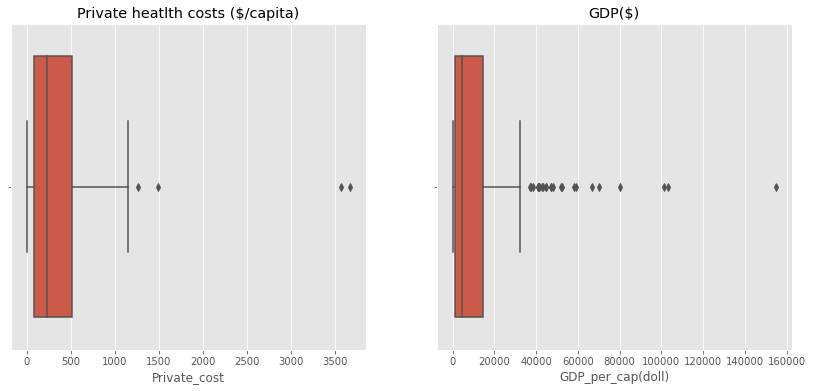

In [52]:
# check distribution of feature with highest kurtosis/skewness
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = complete_1, x = 'Private_cost').set(title='Private heatlth costs ($/capita)') 
sns.boxplot(ax = axes[1], data = complete_1, x = 'GDP_per_cap(doll)').set(title='GDP($)')
plt.show()

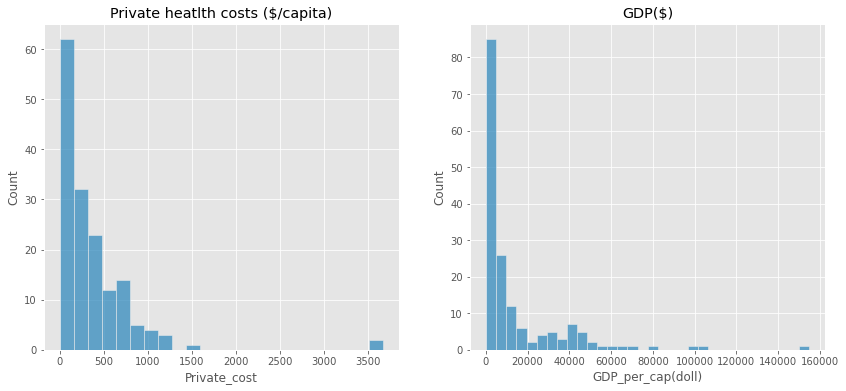

In [53]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = complete_1, x ='Private_cost').set(title='Private heatlth costs ($/capita)') 
sns.histplot(ax = axes[1], data = complete_1, x = 'GDP_per_cap(doll)').set(title='GDP($)')
plt.show()

### Employment data
. important to check metadata (Employment_WB_Metadata.csv) to interpret percentages, as per:

* __per_female_agriculture__: Employment in agriculture, female (% of female employment)
* __per_male_agriculture__: Employment in agriculture, male (% of male employment) 
* __per_total_agriculture__: Employment in agriculture (% of total employment)
* __per_female_employment__: Employment to population ratio, 15+, female (%)
* __per_male_employment__: Employment to population ratio, 15+, male (%)  
* __per_total_employment__: Employment to population ratio, 15+, total (%) 
* __per_female_industry__: Employment in industry, female (% of female employment) 
* __per_male_industry__: Employment in industry, male (% of male employment)
* __per_total_industry__: Employment in industry (% of total employment)
* __per_female_services__: Employment in services, female (% of female employment)
* __per_male_industry__: Employment in industry, male (% of male employment)
* __per_total_services__: Employment in services (% of total employment) 




In [54]:
df_employment = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Employment_WB_2/Employment_WB_2.xlsx',na_values='..')

In [55]:
df_employment = df_employment[['Series Code', 'Country Name', '2009 [YR2009]']].copy()

In [56]:
df_employment.isna().sum()

Series Code        0
Country Name       0
2009 [YR2009]    372
dtype: int64

In [57]:
df_employment

,Series Code,Country Name,2009 [YR2009]
0,SL.EMP.TOTL.SP.ZS,Afghanistan,42.349998
1,SL.EMP.TOTL.SP.MA.ZS,Afghanistan,70.360001
2,SL.EMP.TOTL.SP.FE.ZS,Afghanistan,12.860000
3,SL.SRV.EMPL.MA.ZS,Afghanistan,32.680000
4,SL.SRV.EMPL.FE.ZS,Afghanistan,10.970000
...,...,...,...
3163,SL.IND.EMPL.FE.ZS,Zimbabwe,3.210000
3164,SL.IND.EMPL.ZS,Zimbabwe,9.180000
3165,SL.AGR.EMPL.MA.ZS,Zimbabwe,59.720001
3166,SL.AGR.EMPL.FE.ZS,Zimbabwe,72.320000


In [58]:
df_employment = df_employment.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [59]:
df_employment = df_employment.rename_axis('location_name')

In [60]:
df_employment 

Series Code,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,SL.EMP.TOTL.SP.FE.ZS,SL.EMP.TOTL.SP.MA.ZS,SL.EMP.TOTL.SP.ZS,SL.IND.EMPL.FE.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.FE.ZS,SL.SRV.EMPL.MA.ZS,SL.SRV.EMPL.ZS
location_name,,,,,,,,,,,,
Afghanistan,74.220001,53.889999,56.889999,12.860000,70.360001,42.349998,14.810000,13.430000,13.630000,10.970000,32.680000,29.480000
Albania,57.220001,35.049999,44.049999,37.919998,56.360001,47.070000,10.260000,26.559999,19.940001,32.520000,38.389999,36.009998
Algeria,4.200000,14.620000,13.030000,11.630000,63.720001,37.820000,24.730000,30.440001,29.570000,71.080002,54.930000,57.400002
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,24.010000,10.060000,12.600000,11.470000,50.380001,31.129999,8.460000,26.900000,23.530001,67.529999,63.049999,63.860001
World,32.867313,34.237845,33.697765,46.173780,71.870755,59.003547,16.365849,25.952533,22.196706,50.768125,39.812757,44.106783
"Yemen, Rep.",30.610001,24.520000,25.299999,8.850000,60.720001,34.779999,13.050000,19.219999,18.430000,56.349998,56.259998,56.270000


In [61]:
df_employment.rename(columns={'SL.AGR.EMPL.FE.ZS':'per_female_agriculture',\
                      'SL.AGR.EMPL.MA.ZS':'per_male_agriculture',\
                      'SL.AGR.EMPL.ZS':'per_total_agriculture',\
                      'SL.EMP.TOTL.SP.ZS':'per_total_employment',\
                      'SL.EMP.TOTL.SP.MA.ZS':'per_male_employment',\
                      'SL.EMP.TOTL.SP.FE.ZS':'per_female_employment',\
                      'SL.IND.EMPL.FE.ZS':'per_female_industry',\
                      'SL.IND.EMPL.MA.ZS':'per_male_industry',\
                      'SL.IND.EMPL.ZS':'per_total_industry',\
                      'SL.SRV.EMPL.FE.ZS':'per_female_services',\
                      'SL.SRV.EMPL.MA.ZS':'per_male_industry',\
                      'SL.SRV.EMPL.ZS':'per_total_services'}, inplace=True)

In [62]:
df_employment

Series Code,per_female_agriculture,per_male_agriculture,per_total_agriculture,per_female_employment,per_male_employment,per_total_employment,per_female_industry,per_male_industry,per_total_industry,per_female_services,per_male_industry,per_total_services
location_name,,,,,,,,,,,,
Afghanistan,74.220001,53.889999,56.889999,12.860000,70.360001,42.349998,14.810000,13.430000,13.630000,10.970000,32.680000,29.480000
Albania,57.220001,35.049999,44.049999,37.919998,56.360001,47.070000,10.260000,26.559999,19.940001,32.520000,38.389999,36.009998
Algeria,4.200000,14.620000,13.030000,11.630000,63.720001,37.820000,24.730000,30.440001,29.570000,71.080002,54.930000,57.400002
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,24.010000,10.060000,12.600000,11.470000,50.380001,31.129999,8.460000,26.900000,23.530001,67.529999,63.049999,63.860001
World,32.867313,34.237845,33.697765,46.173780,71.870755,59.003547,16.365849,25.952533,22.196706,50.768125,39.812757,44.106783
"Yemen, Rep.",30.610001,24.520000,25.299999,8.850000,60.720001,34.779999,13.050000,19.219999,18.430000,56.349998,56.259998,56.270000


#### Let's merge some of the Employment data frame columns to the complete df
* complete_1 has info on both genders, let's get aggregated data (gender-wise) on df_employment:
1. per_total_industry
2. per_total_agriculture
3. per_total_services
4. per_total_employment

In [63]:
df_employment_totals = df_employment[['per_total_industry','per_total_agriculture','per_total_services','per_total_employment']]

In [64]:
complete_2 = pd.merge(df_employment_totals,complete_1, on='location_name', how='inner')

In [65]:
complete_2

,per_total_industry,per_total_agriculture,per_total_services,per_total_employment,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
location_name,,,,,,,,,,,,,,
Afghanistan,13.630000,56.889999,29.480000,42.349998,0.001293,0.000115,0.007573,0.006548,0.015242,0.004300,0.000168,7.680923,103.188835,438.076034
Albania,19.940001,44.049999,36.009998,47.070000,0.001143,0.000095,0.004759,0.010407,0.024004,0.010758,0.000352,202.939850,188.257721,4114.140114
Algeria,29.570000,13.030000,57.400002,37.820000,0.001448,0.000131,0.008899,0.008974,0.018985,0.007246,0.000240,467.185333,191.505280,3883.132425
American Samoa,NaN,NaN,NaN,NaN,0.001243,0.000050,0.003640,0.009481,0.017709,0.008634,0.000268,NaN,NaN,11961.258226
Andorra,NaN,NaN,NaN,NaN,0.001523,0.000122,0.009193,0.006882,0.025708,0.010475,0.000200,1884.315308,840.804810,43503.185516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,20.959999,10.950000,68.089996,60.680000,0.001388,0.000152,0.006714,0.006413,0.020301,0.007774,0.000321,791.993225,542.296631,9451.932449
Uzbekistan,22.480000,28.090000,49.439999,59.599998,0.000896,0.000121,0.007301,0.012461,0.030297,0.008098,0.000311,119.411751,162.179382,1213.265328
Vanuatu,7.030000,60.549999,32.419998,66.320000,0.001164,0.000047,0.004260,0.008591,0.016476,0.007516,0.000315,56.090603,11.152098,2649.618144


In [69]:
# Missing values (% of total data)
complete_2.isna().sum()/1.68

per_total_industry           9.523810
per_total_agriculture        9.523810
per_total_services           9.523810
per_total_employment         9.523810
Anxiety disorders            0.000000
Bipolar disorder             0.000000
Depressive disorders         0.000000
Dermatitis                   0.000000
Headache disorders           0.000000
Musculoskeletal disorders    0.000000
Stroke                       0.000000
Public_cost                  5.952381
Private_cost                 5.952381
GDP_per_cap(doll)            1.785714
dtype: float64

In [66]:
complete_2.describe()

,per_total_industry,per_total_agriculture,per_total_services,per_total_employment,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
count,152.000000,152.000000,152.000000,152.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,158.000000,158.000000,165.000000
mean,19.564013,29.170263,51.266974,57.280197,0.001179,0.000103,0.007348,0.008870,0.019618,0.007486,0.000260,764.853766,367.229760,14251.332250
std,8.673851,24.252792,18.828472,11.873692,0.000251,0.000031,0.002471,0.001871,0.004307,0.002767,0.000148,1039.690506,480.433613,22206.975923
min,2.130000,0.330000,8.410000,34.389999,0.000738,0.000044,0.002446,0.005458,0.010909,0.002894,0.000093,4.098026,2.774991,212.136880
25%,13.810000,6.925000,36.137500,49.430000,0.000962,0.000083,0.005710,0.007444,0.016568,0.004887,0.000155,70.405787,79.233982,1344.728409
50%,20.010000,23.355000,53.610001,56.945000,0.001177,0.000103,0.006930,0.008568,0.018457,0.007508,0.000220,293.901901,227.549881,4714.702495
75%,25.262500,46.712499,66.950003,64.649998,0.001336,0.000126,0.009023,0.010151,0.023692,0.009572,0.000311,948.638733,512.998985,14794.971105
max,58.450001,88.680000,85.739998,85.480003,0.001927,0.000195,0.016702,0.016198,0.030297,0.013889,0.000883,5282.389648,3665.752686,154762.199427


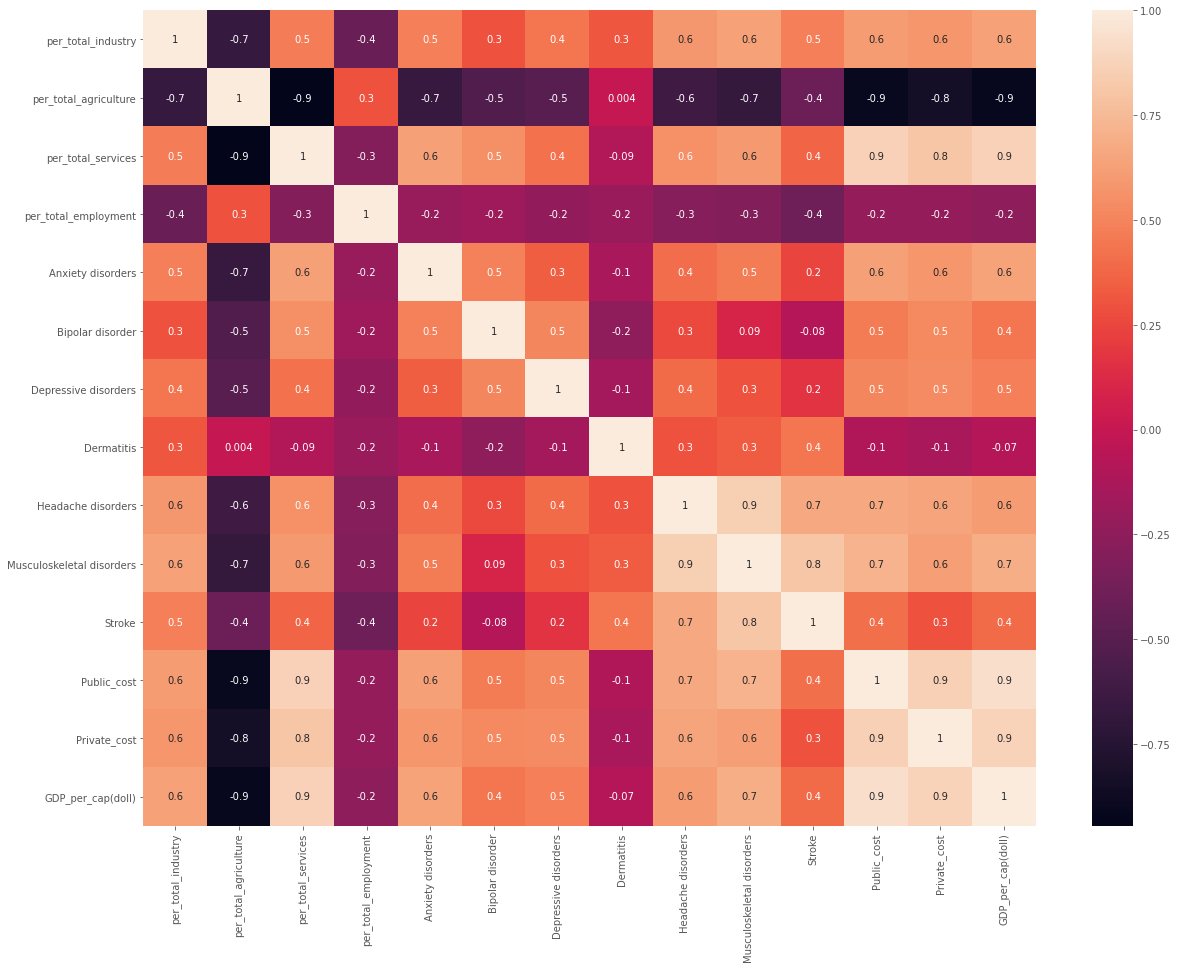

In [67]:
#check correlations:
df_corr = complete_2.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()
# 

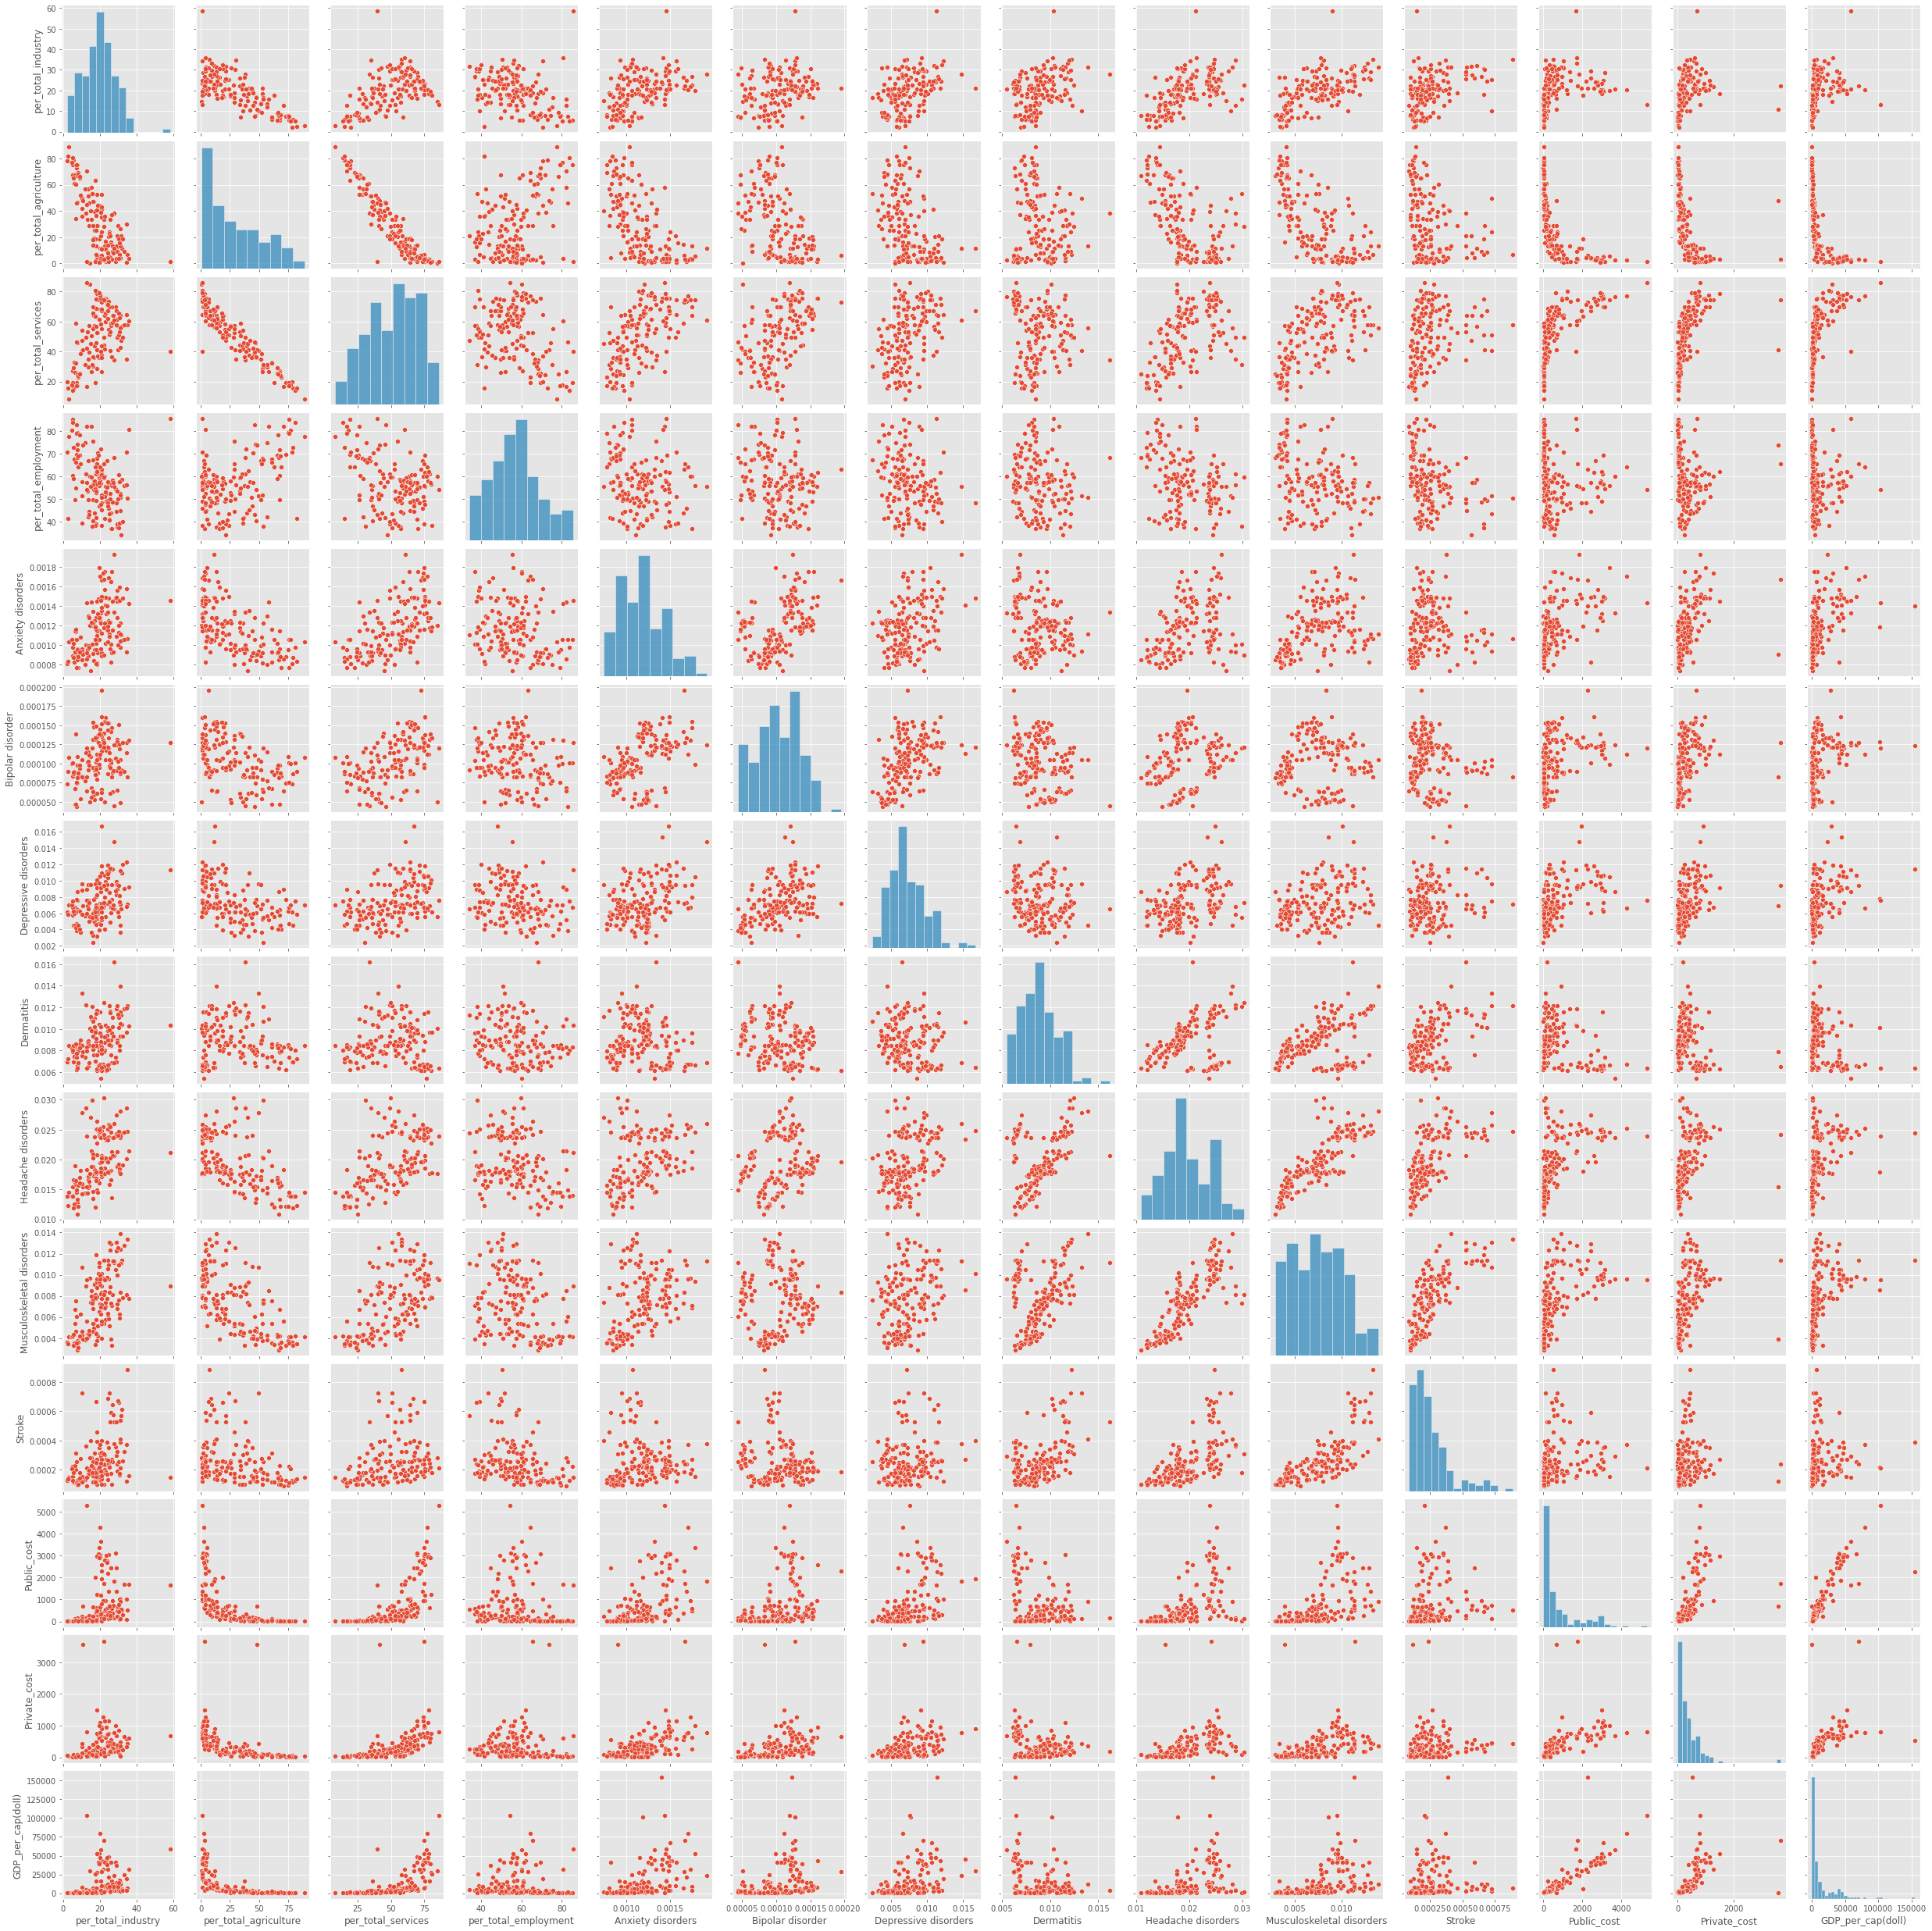

In [70]:
# Create column with total percentage of incidence for all diseases (it's % over whole population)
sns.pairplot(complete_2)
plt.show()